# Project 5 - Fast/Good/Cheap

We are limited to a cheap model in that we only have access to the limited dataset instead of full data.

We are able to use any algorithm/model we choose and may use as many features as we like.

Members: Alex Harmon, C.J. Warner, Joe Darby

### Importing and Cleaning

In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df_raw = pd.read_csv('./data/cheap_train_sample.csv')
df_raw.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,56,Private,346033,9th,5,Divorced,Adm-clerical,Not-in-family,Male,0,0,40,United-States,<=50K
1,28,Private,96226,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,45,United-States,<=50K
2,33,Private,251120,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,7688,0,50,United-States,>50K
3,26,Private,178140,Bachelors,13,Married-civ-spouse,Other-service,Husband,Male,0,0,45,United-States,>50K
4,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,Female,14084,0,55,United-States,>50K


In [8]:
df_raw.shape

(6513, 14)

In [9]:
df_raw.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage              0
dtype: int64

In [10]:
df_raw.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
wage              object
dtype: object

In [11]:
df['workclass'].value_counts()

 Private             4545
 Self-emp-not-inc     504
 Local-gov            421
 ?                    363
 State-gov            262
 Self-emp-inc         225
 Federal-gov          189
 Without-pay            2
 Never-worked           2
Name: workclass, dtype: int64

`Workclass` has 363 unclassifed data points...aka nulls

In [19]:
df_raw['education'].value_counts()

 HS-grad         2103
 Some-college    1451
 Bachelors       1113
 Masters          334
 Assoc-voc        250
 11th             225
 Assoc-acdm       222
 10th             175
 7th-8th          142
 9th              106
 Prof-school      103
 12th              89
 Doctorate         81
 5th-6th           79
 1st-4th           27
 Preschool         13
Name: education, dtype: int64

In [20]:
df_raw['marital-status'].value_counts()

 Married-civ-spouse       2978
 Never-married            2135
 Divorced                  898
 Separated                 210
 Widowed                   204
 Married-spouse-absent      81
 Married-AF-spouse           7
Name: marital-status, dtype: int64

In [21]:
df_raw['occupation'].value_counts()

 Exec-managerial      853
 Prof-specialty       840
 Craft-repair         831
 Adm-clerical         761
 Other-service        684
 Sales                681
 Machine-op-inspct    377
 ?                    365
 Transport-moving     320
 Handlers-cleaners    268
 Farming-fishing      184
 Tech-support         182
 Protective-serv      129
 Priv-house-serv       36
 Armed-Forces           2
Name: occupation, dtype: int64

`Occupation` has 365 unclassified data points...aka nulls

In [22]:
df_raw['relationship'].value_counts()

 Husband           2612
 Not-in-family     1665
 Own-child         1019
 Unmarried          701
 Wife               322
 Other-relative     194
Name: relationship, dtype: int64

In [23]:
df_raw['sex'].value_counts()

 Male      4326
 Female    2187
Name: sex, dtype: int64

In [24]:
df_raw['native-country'].value_counts()

 United-States                 5807
 Mexico                         150
 ?                              120
 Philippines                     43
 El-Salvador                     29
 Canada                          26
 Germany                         24
 Dominican-Republic              20
 Jamaica                         18
 South                           18
 China                           17
 India                           17
 Puerto-Rico                     17
 Cuba                            16
 England                         16
 Italy                           15
 Poland                          14
 Japan                           12
 Guatemala                       11
 Columbia                        11
 Haiti                           11
 Taiwan                          10
 Iran                            10
 France                           9
 Peru                             9
 Vietnam                          8
 Cambodia                         6
 Nicaragua                  

`Native-country` has 120 unclassified data points...aka nulls

In [25]:
df_raw['wage'].value_counts()

 <=50K    4945
 >50K     1568
Name: wage, dtype: int64

### Dropping the unclassified data points

In [36]:
df_raw[(df_raw['workclass'] == ' ?') | (df_raw['occupation'] == ' ?') | (df_raw['native-country'] == ' ?')].shape

(480, 14)

In [364]:
df_raw[(df_raw['workclass'] == ' ?') | (df_raw['occupation'] == ' ?') | (df_raw['native-country'] == ' ?')].head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
27,34,?,133861,HS-grad,9,Married-civ-spouse,?,Husband,Male,0,0,25,United-States,<=50K
65,19,?,117201,HS-grad,9,Never-married,?,Own-child,Male,0,0,30,United-States,<=50K
70,70,?,28471,9th,5,Widowed,?,Unmarried,Female,0,0,25,United-States,<=50K
83,34,Private,198613,11th,7,Married-civ-spouse,Sales,Husband,Male,0,0,25,?,<=50K
89,25,?,196627,11th,7,Never-married,?,Own-child,Male,0,0,40,United-States,<=50K


In [42]:
df_raw[(df_raw['workclass'] != ' ?') & (df_raw['occupation'] != ' ?') & (df_raw['native-country'] != ' ?')].shape

In [45]:
df = df_raw[(df_raw['workclass'] != ' ?') & (df_raw['occupation'] != ' ?') & (df_raw['native-country'] != ' ?')]

In [47]:
print(df.shape)
df.head()

(6033, 14)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,56,Private,346033,9th,5,Divorced,Adm-clerical,Not-in-family,Male,0,0,40,United-States,<=50K
1,28,Private,96226,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,0,0,45,United-States,<=50K
2,33,Private,251120,Bachelors,13,Married-civ-spouse,Sales,Husband,Male,7688,0,50,United-States,>50K
3,26,Private,178140,Bachelors,13,Married-civ-spouse,Other-service,Husband,Male,0,0,45,United-States,>50K
4,40,Federal-gov,56795,Masters,14,Never-married,Exec-managerial,Not-in-family,Female,14084,0,55,United-States,>50K


## Time for Dummies, EDA, and Feature Engineering

In [54]:
df_dummies = pd.get_dummies(df,
                            columns=['workclass','education','marital-status','occupation',
                                     'relationship','sex','native-country','wage'],
                            drop_first=True)

In [64]:
df_dummies.shape

(6033, 92)

In [60]:
df_dummies.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,wage_ >50K
0,56,346033,5,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,28,96226,9,0,0,45,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,251120,13,7688,0,50,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,26,178140,13,0,0,45,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,40,56795,14,14084,0,55,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


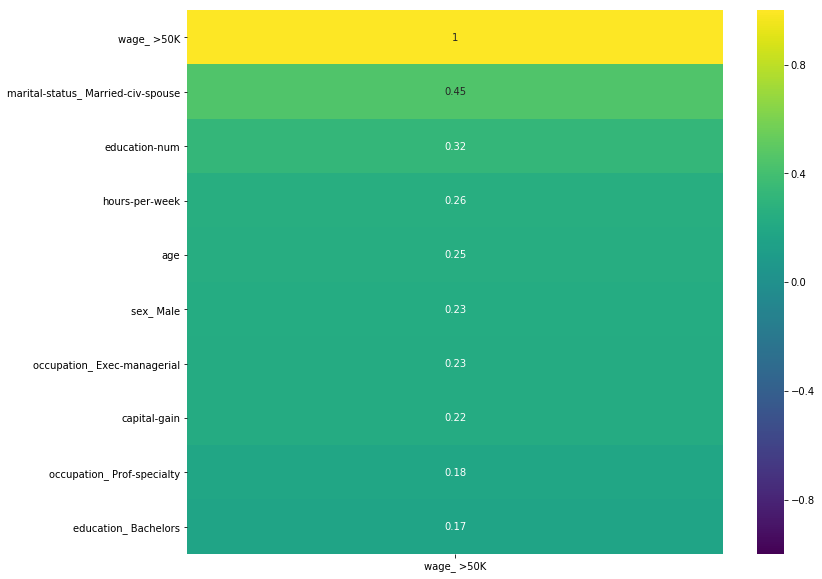

In [92]:
plt.figure(figsize=(12,10))
sns.heatmap(df_dummies.corr().sort_values('wage_ >50K', ascending=False)[['wage_ >50K']][:10],
            vmin=-1,
            vmax=1,
            annot=True,
            cmap='viridis')

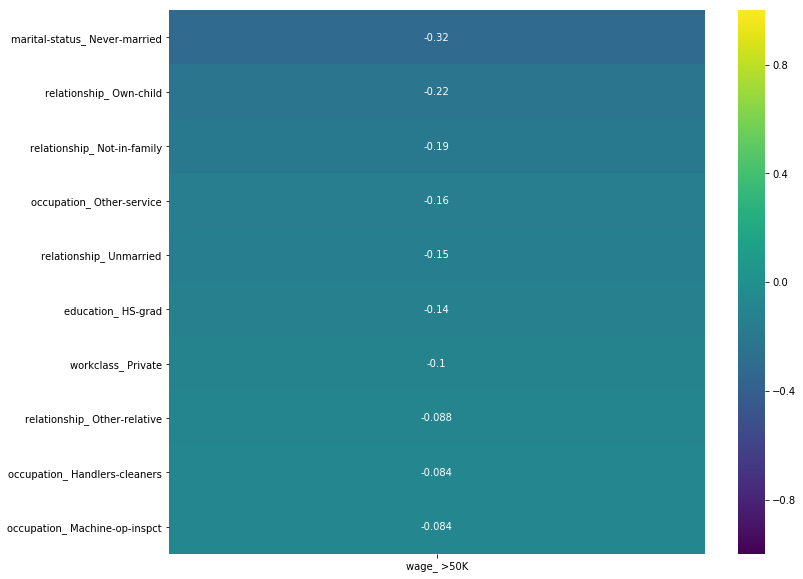

In [91]:
plt.figure(figsize=(12,10))
sns.heatmap(df_dummies.corr().sort_values('wage_ >50K')[['wage_ >50K']][:10],
            vmin=-1,
            vmax=1,
            annot=True,
            cmap='viridis')

#### Baseline Accuracy
    75.05%

In [93]:
df_dummies['wage_ >50K'].value_counts(normalize=True)

0    0.750539
1    0.249461
Name: wage_ >50K, dtype: float64

## Modeling

### Logistic Regression

In [167]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

In [155]:
X = df_dummies.drop(columns='wage_ >50K')
y = df_dummies['wage_ >50K']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y)

In [157]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [240]:
lr = LogisticRegressionCV(cv=10, max_iter=500, penalty='l1', solver='liblinear')

In [241]:
lr.fit(X_train_scaled, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=500,
           multi_class='warn', n_jobs=None, penalty='l1',
           random_state=None, refit=True, scoring=None, solver='liblinear',
           tol=0.0001, verbose=0)

In [242]:
lr.score(X_train_scaled, y_train), lr.score(X_test_scaled, y_test)

(0.8465959328028294, 0.8429423459244533)

Our base logistic regression model is only slightly overfit and performed much better than the baseline -- 84% > 75%

Let's try some other models

In [250]:
lr_preds = lr.predict(X_test_scaled)

In [251]:
from sklearn.metrics import confusion_matrix

In [252]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_preds).ravel()

In [253]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 1045
False Positives: 88
False Negatives: 149
True Positives: 227


In [204]:
lr.coef_[0].shape

(91,)

In [205]:
coef_df = pd.DataFrame({
    'value': lr.coef_[0],
    'variable': X.columns
})

In [208]:
coef_df.sort_values('value')

,value,variable
36,-0.170733,occupation_ Farming-fishing
48,-0.127363,relationship_ Own-child
9,-0.109423,workclass_ Self-emp-not-inc
30,-0.101428,marital-status_ Never-married
39,-0.094197,occupation_ Other-service
38,-0.088629,occupation_ Machine-op-inspct
6,-0.067908,workclass_ Local-gov
10,-0.054251,workclass_ State-gov
47,-0.053997,relationship_ Other-relative
24,-0.049664,education_ Preschool


In [218]:
coef_df_imp = coef_df[(coef_df['value'] >= 0.02) | (coef_df['value'] <= -0.02)]

In [232]:
lasso_features = [each for each in coef_df_imp['variable'].values]

In [234]:
df_lasso = df_dummies[lasso_features]

In [245]:
X = df_lasso
y = df_dummies['wage_ >50K']

X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X, y,
                                                                            stratify=y,
                                                                            random_state=42)

X_train_lasso_scaled = ss.fit_transform(X_train_lasso)
X_test_lasso_scaled = ss.transform(X_test_lasso)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [339]:
len(df_lasso.columns)

36

In [340]:
lr_new = LogisticRegressionCV(cv=10, max_iter=1000)
lr_new.fit(X_train_lasso_scaled, y_train_lasso)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [341]:
lr_new.score(X_train_lasso_scaled, y_train_lasso), lr_new.score(X_test_lasso_scaled, y_test_lasso)

(0.8499115826702034, 0.8442677269715043)

In [342]:
lr_preds_lasso = lr_new.predict(X_test_lasso_scaled)

In [343]:
tn, fp, fn, tp = confusion_matrix(y_test, lr_preds_lasso).ravel()

In [344]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 1039
False Positives: 94
False Negatives: 141
True Positives: 235


### kNN and Naive Bayes

In [94]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [95]:
mnb = MultinomialNB(alpha=1.0)

In [113]:
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [114]:
mnb.score(X_train, y_train), mnb.score(X_test, y_test)

(0.7769672855879752, 0.7826375082836315)

In [115]:
mnb_preds = mnb.predict(X_test)

In [116]:
tn, fp, fn, tp = confusion_matrix(y_test, mnb_preds).ravel()

In [117]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 1088
False Positives: 45
False Negatives: 283
True Positives: 93


In [128]:
knn = KNeighborsClassifier(n_neighbors=25)

In [261]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform')

In [262]:
knn.score(X_train_scaled, y_train), knn.score(X_test_scaled, y_test)

(0.8348806366047745, 0.8197481776010603)

In [263]:
knn_preds = knn.predict(X_test_scaled)

In [264]:
tn, fp, fn, tp = confusion_matrix(y_test, knn_preds).ravel()

In [265]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 1029
False Positives: 104
False Negatives: 168
True Positives: 208


Both Multinomial Naive Bayes and kNN performed much worse than the Logistic Regression Model

### Time for some TREES!

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [136]:
rf = RandomForestClassifier(n_estimators=10)
et = ExtraTreesClassifier(n_estimators=10)

In [270]:
cross_val_score(rf, X_train_lasso_scaled, y_train_lasso, cv=10).mean()

0.8382043714439584

In [269]:
cross_val_score(et, X_train_lasso_scaled, y_train_lasso, cv=10).mean()

0.8143271257825928

In [271]:
rf_params = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [None, 3, 4, 5],
    'max_features': ['auto', 4, 5]
}

gs = GridSearchCV(rf, param_grid=rf_params, cv=10)
gs.fit(X_train_lasso_scaled, y_train_lasso)
print(gs.best_score_)
gs.best_params_

0.8443854995579133


{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}

In [272]:
et_params = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [None, 3, 4, 5],
    'max_features': ['auto', 4, 5]
}

gs = GridSearchCV(et, param_grid=et_params, cv=10)
gs.fit(X_train_lasso, y_train_lasso)
print(gs.best_score_)
gs.best_params_

0.8171971706454465


{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 20}

### Trying SVM

In [273]:
from sklearn.svm import SVC

In [292]:
svc = SVC(kernel='linear')

In [297]:
svc.fit(X_train_lasso_scaled, y_train_lasso)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [298]:
svc.score(X_train_lasso_scaled, y_train_lasso), svc.score(X_test_lasso_scaled, y_test_lasso)

(0.8492484526967286, 0.8482438701126573)

In [302]:
svc_preds = svc.predict(X_test_lasso_scaled)

In [336]:
pd.Series(y_test).value_counts()

0    1133
1     376
Name: wage_ >50K, dtype: int64

In [337]:
pd.Series(svc_preds).value_counts()

0    1200
1     309
dtype: int64

In [303]:
tn, fp, fn, tp = confusion_matrix(y_test_lasso, svc_preds).ravel()

In [304]:
print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 1052
False Positives: 81
False Negatives: 148
True Positives: 228


### Gradient Boost

In [361]:
from sklearn.ensemble import GradientBoostingClassifier

In [365]:
gboost = GradientBoostingClassifier(max_depth=4, random_state=42)
gboost_params = {
   'n_estimators': [50, 75, 100],
   'learning_rate': [.1, .12]
}

gb_gs = GridSearchCV(gboost, param_grid=gboost_params, cv=3)
gb_gs.fit(X_train_lasso_scaled, y_train_lasso)

print(gb_gs.best_params_)
print(gb_gs.best_score_)
print(gb_gs.score(X_test_lasso_scaled, y_test_lasso))

{'learning_rate': 0.12, 'n_estimators': 75}
0.8538903625110522
0.8508946322067594


## Generating Predictions off our best model = SVM

In [315]:
holdout_df = pd.read_csv('./data/test_data.csv')

In [316]:
holdout_df.shape

(16281, 13)

In [317]:
holdout_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [319]:
holdout_df['workclass'].value_counts()

 Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 ?                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: workclass, dtype: int64

In [320]:
holdout_df = pd.get_dummies(holdout_df,
                            columns=['workclass','education','marital-status','occupation',
                                     'relationship','sex','native-country'],
                            drop_first=True)

In [322]:
holdout_df = holdout_df[lasso_features]

In [350]:
holdout_df = ss.transform(holdout_df)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [351]:
holdout_preds = svc.predict(holdout_df)

In [352]:
holdout_preds = pd.DataFrame({'wage': holdout_preds})

In [353]:
holdout_preds['wage'].value_counts(normalize=True)

0    0.813279
1    0.186721
Name: wage, dtype: float64

In [354]:
holdout_preds.to_csv('./svm_predictions', index=False)

In [366]:
gb_holdout_preds = gb_gs.predict_proba(holdout_df)

In [367]:
gb_holdout_preds = pd.DataFrame({'wage': gb_holdout_preds})

In [368]:
holdout_preds.to_csv('./gb_predictions', index=False)

In [369]:
gb_holdout_preds['wage'].value_counts(normalize=True)

0    0.810884
1    0.189116
Name: wage, dtype: float64